# RNN Stock Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('sbux.csv')

In [8]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [9]:
series = df['close'].values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [10]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)

In [13]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)#Dense(1, activation = 'sigmoid')(x)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr=0.01)
)
r = model.fit(
    X[:-N//2], Y[:-N//2], validation_data = (X[-N//2:], Y[-N//2:]), epochs =80
)

Epoch 1/80
20/20 [==============================] - 1s 27ms/step - loss: 1.2455 - val_loss: 5.6097
Epoch 2/80
20/20 [==============================] - 0s 7ms/step - loss: 0.5341 - val_loss: 2.7203
Epoch 3/80
20/20 [==============================] - 0s 7ms/step - loss: 0.2335 - val_loss: 1.6484
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.1060 - val_loss: 1.1146
Epoch 5/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0490 - val_loss: 0.6335
Epoch 6/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0255 - val_loss: 0.3925
Epoch 7/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0173 - val_loss: 0.2740
Epoch 8/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0130 - val_loss: 0.2252
Epoch 9/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0106 - val_loss: 0.1843
Epoch 10/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 0.1534
Epoch 11/80
20/20 

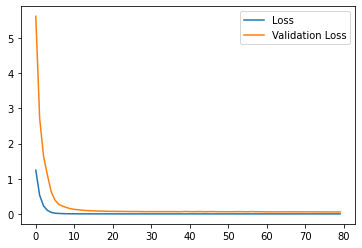

In [14]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()

(1249, 1)


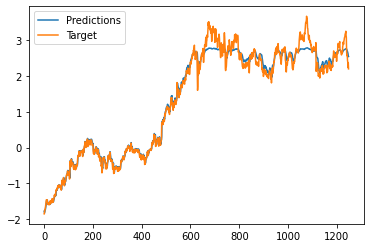

In [15]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.plot(predictions, label = 'Predictions')
plt.plot(Y, label='Target')
plt.legend()

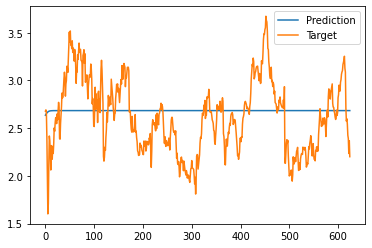

In [16]:
validation_target = Y[-N//2:]
validation_prediction = []
last_x = X[-N//2]
while len(validation_prediction) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0]
  validation_prediction.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_prediction, label ='Prediction')
plt.plot(validation_target, label = 'Target')
plt.legend()

In [18]:
#returns 
df['PrevClose'] = df['close'].shift(1)
df['Return'] = (df['close'] - df['PrevClose']) /df['PrevClose']

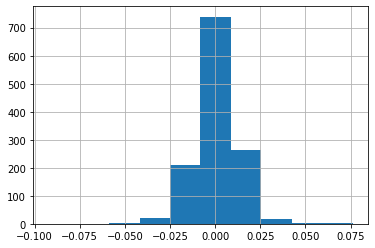

In [20]:
df['Return'].hist()

In [21]:
series = df['Return'].values[1:].reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [22]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)

In [23]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)#Dense(1, activation = 'sigmoid')(x)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr=0.01)
)
r = model.fit(
    X[:-N//2], Y[:-N//2], validation_data = (X[-N//2:], Y[-N//2:]), epochs =80
)

Epoch 1/80
20/20 [==============================] - 0s 23ms/step - loss: 0.9925 - val_loss: 1.1387
Epoch 2/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9879 - val_loss: 1.1454
Epoch 3/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9856 - val_loss: 1.1397
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9888 - val_loss: 1.1423
Epoch 5/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9857 - val_loss: 1.1408
Epoch 6/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9866 - val_loss: 1.1405
Epoch 7/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9835 - val_loss: 1.1481
Epoch 8/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9863 - val_loss: 1.1398
Epoch 9/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9831 - val_loss: 1.1463
Epoch 10/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9819 - val_loss: 1.1465
Epoch 11/80
20/20 

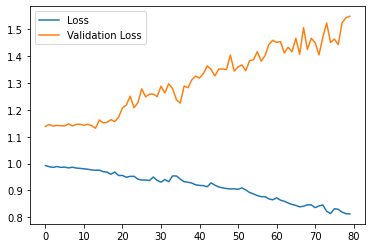

In [24]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()

(1248, 1)


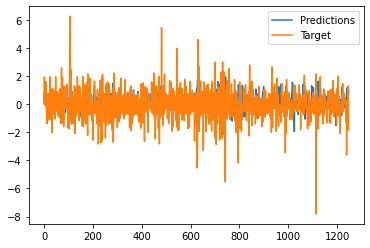

In [25]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.plot(predictions, label = 'Predictions')
plt.plot(Y, label='Target')
plt.legend()

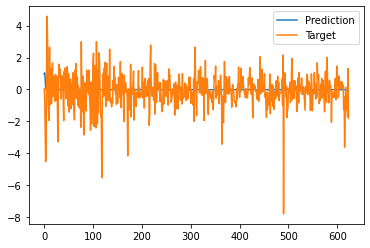

In [26]:
validation_target = Y[-N//2:]
validation_prediction = []
last_x = X[-N//2]
while len(validation_prediction) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0]
  validation_prediction.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_prediction, label ='Prediction')
plt.plot(validation_target, label = 'Target')
plt.legend()

In [35]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [36]:
T = 10 
D = input_data.shape[1]
N = len(input_data) -T

In [37]:
Ntrain = len(input_data) * 2//3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [38]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)
for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)


In [39]:
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)
for u in range(N - Ntrain):
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [40]:
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss ='binary_crossentropy',
    optimizer = Adam(lr=0.001),
    metrics = ['accuracy']
)

In [41]:
r = model.fit(
    X_train, Y_train,
    batch_size = 32, 
    epochs = 300, 
    validation_data = (X_test, Y_test)
)

Epoch 1/300
27/27 [==============================] - 1s 20ms/step - loss: 0.7004 - accuracy: 0.4934 - val_loss: 0.6942 - val_accuracy: 0.4854
Epoch 2/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.5364 - val_loss: 0.6979 - val_accuracy: 0.4805
Epoch 3/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5328 - val_loss: 0.6971 - val_accuracy: 0.4829
Epoch 4/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6909 - accuracy: 0.5268 - val_loss: 0.6931 - val_accuracy: 0.4976
Epoch 5/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6909 - accuracy: 0.5316 - val_loss: 0.6937 - val_accuracy: 0.4878
Epoch 6/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.5030 - val_loss: 0.6939 - val_accuracy: 0.5024
Epoch 7/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.5399 - val_loss: 0.6925 - val_accuracy: 0.5024
Epoch 8/300


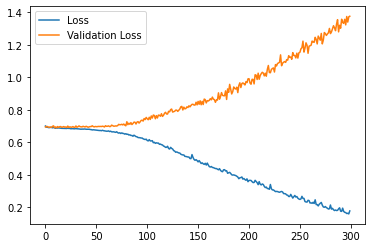

In [42]:
plt.plot(r.history['loss'], label ='Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()

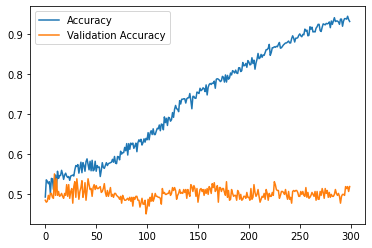

In [43]:
plt.plot(r.history['accuracy'], label ='Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()